<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/CNN_Functional_API%20(base_model_freeze%20and%20Unfreeze).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION:
---



### We're going to go through the follow with TensorFlow:

Introduction to fine-tuning, a type of transfer learning to modify a pre-trained model to be more suited to your data Using the Keras Functional API (a differnt way to build models in Keras)

```
Building the transfer learning the feature extraction model:
steps:
✅create the base model.
🧖{base_model=tf.keras.applications.efficientNetB0(include_Top=False}

✅Freeze the base Model.
🧖{base_model.training=False }

✅Create the input layer.
🧖 {input= tf.keras.layer.Input(shape=224,224,3),name-'Input Layer'}

✅OPTIONAL:if using model with does not have inbuilt rescaling,then it need to
   be normalize.
🧖{tf.keras.layers.experimental.preprocessing.rescaling(1/255.)}

✅Pass the Input to the base model.
🧖{x=base_model(input,trainable=False)}

✅Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
🧖{x = tf.keras.layers.lobalAveragePooling2Dname="global_average_pooling_layer")(x)print(f"After GlobalAveragePooling2D(): {x.shape}")

✅Create the output Layer:
🧖{output=tf.keras.layers.Dense(10,activation='softmax')(x)}


```
fine-tuning transfer learning the pre-trained model weights from another model are unfrozen and tweaked during to better suit the data.

**For feature extraction transfer learning:** we  only train the top 1-3 layers of a pre-trained model with our own data.

**In fine-tuning transfer learning:** We might train 1-3+ layers of a pre-trained model (where the '+' indicates that many or all of the layers could be trained).

# Code Section:Feature Extraction and Fine Tuning.
---


In [1]:
import zipfile 
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_hub as hub
import os
import matplotlib.pyplot as plt
import pathlib
import datetime

In [2]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 
## unzipping the file
unzip=zipfile.ZipFile("10_food_classes_10_percent.zip")
unzip.extractall()
unzip.close()


--2022-02-14 13:23:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.69.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   196MB/s    in 0.8s    

2022-02-14 13:23:33 (196 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
## setting dir path and checking the label from dir
train_dir='10_food_classes_10_percent/train/'
test_dir='10_food_classes_10_percent/test/'

print("List of Label from dir:\n")
for x in os.listdir(train_dir):
    print(x)

List of Label from dir:

chicken_wings
pizza
steak
chicken_curry
ice_cream
ramen
fried_rice
hamburger
sushi
grilled_salmon


In [4]:
## importing the class name:
data_dir=pathlib.Path(train_dir)
class_label=np.array(sorted([i.name for i in data_dir.glob('*')]))
print(class_label)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# creating the data input:
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode="categorical",
                                                                batch_size=32,
                                                                image_size=(224,224))


test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                batch_size=32,
                                                                image_size=(224,224))


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
for image,label in train_data.take(1):
    print(image,label)

tf.Tensor(
[[[[2.26984695e+02 2.44397949e+02 1.98158173e+02]
   [2.25857132e+02 2.43857132e+02 1.94000000e+02]
   [2.29857132e+02 2.49933670e+02 1.96704086e+02]
   ...
   [1.83494812e+02 2.35066284e+02 1.99280548e+02]
   [1.82188797e+02 2.36188797e+02 2.00188797e+02]
   [1.80928467e+02 2.36101974e+02 1.99515228e+02]]

  [[2.28903061e+02 2.48903061e+02 1.96096939e+02]
   [2.26285706e+02 2.46285706e+02 1.93295914e+02]
   [2.30586731e+02 2.51229584e+02 1.99872452e+02]
   ...
   [1.86387680e+02 2.36499939e+02 2.01015289e+02]
   [1.85846954e+02 2.37857162e+02 2.01857162e+02]
   [1.86025436e+02 2.38831635e+02 2.02831635e+02]]

  [[2.23714294e+02 2.48928574e+02 1.90285721e+02]
   [2.23000000e+02 2.46484680e+02 1.90142853e+02]
   [2.27260193e+02 2.49596939e+02 2.00903061e+02]
   ...
   [1.89336716e+02 2.38188812e+02 2.02806183e+02]
   [1.89943863e+02 2.39301010e+02 2.04086731e+02]
   [1.88147934e+02 2.37505081e+02 2.02719360e+02]]

  ...

  [[2.42000061e+02 2.52428589e+02 4.22244301e+01]
   [2

In [7]:
# creating the model layering.

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

input=   tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=base_model(input ,training =False)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D()(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

output=tf.keras.layers.Dense(10,activation ='softmax')(x)

## creating the model_0
model_0=tf.keras.Model(input,output)


16719872/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [8]:
cb=("10_food_classes_10_percent"+datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
## compiling the model:

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## fitting the model:
history_model_0=model_0.fit(train_data,
                             epochs=5,
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            steps_per_epoch=len(train_data),
                            callbacks=[tf.keras.callbacks.TensorBoard(cb)])


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
24/24 [==============================] - 39s 675ms/step - loss: 1.8911 - accuracy: 0.4053 - val_loss: 1.3343 - val_accuracy: 0.7160
Epoch 2/5
24/24 [==============================] - 14s 567ms/step - loss: 1.1145 - accuracy: 0.7587 - val_loss: 0.9090 - val_accuracy: 0.8004
Epoch 3/5
24/24 [==============================] - 14s 566ms/step - loss: 0.8041 - accuracy: 0.8227 - val_loss: 0.7415 - val_accuracy: 0.8220
Epoch 4/5
24/24 [==============================] - 14s 565ms/step - loss: 0.6527 - accuracy: 0.8547 - val_loss: 0.6532 - val_accuracy: 0.8332
Epoch 5/5
24/24 [==============================] - 14s 565ms/step - loss: 0.5571 - accuracy: 0.8760 - val_loss: 0.6056 - val_accuracy: 0.8364


In [9]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 127ms/step - loss: 0.6056 - accuracy: 0.8364


[0.6055771112442017, 0.8363999724388123]

In [10]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [11]:
curve_data=pd.DataFrame(history_model_0.history)
curve_data

,loss,accuracy,val_loss,val_accuracy
0,1.891123,0.405333,1.334322,0.7160
1,1.114512,0.758667,0.908951,0.8004
2,0.804084,0.822667,0.741489,0.8220
3,0.652732,0.854667,0.653200,0.8332
4,0.557097,0.876000,0.605577,0.8364


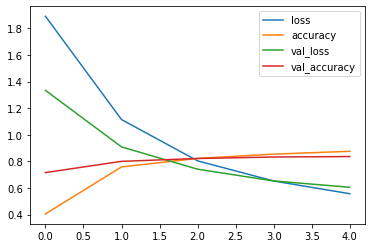

In [12]:
curve_data.plot()

### getting feature vector for our model:

In [13]:
import zipfile 
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_hub as hub
import os
import matplotlib.pyplot as plt
import pathlib
import datetime

In [14]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

## unzipping the file
unizip=zipfile.ZipFile('10_food_classes_10_percent.zip')
unizip.extractall()
unizip.close()


--2022-02-14 13:25:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   116MB/s    in 1.4s    

2022-02-14 13:25:43 (116 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [15]:
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [16]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(    train_dir,
                                                                         batch_size=32,
                                                                            image_size=(224,224),
                                                                                label_mode='categorical')

test_data=tf.keras.preprocessing.image_dataset_from_directory(  test_dir,
                                                                    batch_size=32,
                                                                        image_size=(224,224),
                                                                             label_mode='categorical')


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
data_aug=tf.keras.Sequential([ 
                              tf.keras.layers.RandomFlip('horizontal'),
                              tf.keras.layers.RandomRotation(0.2),
                              tf.keras.layers.RandomZoom(0.2),
                              tf.keras.layers.RandomHeight(0.2),
                              tf.keras.layers.Rescaling(1/255.)
])

In [18]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

input=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x=data_aug(input)

x=base_model(x,training=False)

x=tf.keras.layers.GlobalAveragePooling2D()(x)

output=tf.keras.layers.Dense(10,activation="sigmoid")(x)

model_1=tf.keras.Model(input,output)

In [19]:
model_1.compile(  loss=tf.keras.losses.CategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                                        metrics=['accuracy'],
                )

history_model_1=model_1.fit(train_data,
                                epochs=4,
                                    validation_steps=len(test_data),
                                        steps_per_epoch=len(train_data),
                                            validation_data=test_data,
                                                callbacks=[tf.keras.callbacks.TensorBoard('10_food_classes_10_percent/effBO_101FooD_10percent '+ 
                                                                                              datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))]
                            )

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/4
24/24 [==============================] - 30s 895ms/step - loss: 2.3217 - accuracy: 0.0973 - val_loss: 2.3066 - val_accuracy: 0.1000
Epoch 2/4
24/24 [==============================] - 16s 676ms/step - loss: 2.3276 - accuracy: 0.0813 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 3/4
24/24 [==============================] - 26s 1s/step - loss: 2.3179 - accuracy: 0.0787 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 4/4
24/24 [==============================] - 15s 605ms/step - loss: 2.3167 - accuracy: 0.0920 - val_loss: 2.3039 - val_accuracy: 0.0876


In [20]:
# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])

In [21]:
#Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, 
                                                      save_freq="epoch", # save every epoch
                                                         verbose=1)
#Setup callback path
dir_call='10_food_classes_10_percent/effBO_101FooD_10percent '+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

# creating the callback functions:
callback= tf.keras.callbacks.TensorBoard(dir_call)


# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[callback, 
                                                     checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0766 - accuracy: 0.3147
Epoch 00001: val_loss improved from inf to 1.59292, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 28s 856ms/step - loss: 2.0766 - accuracy: 0.3147 - val_loss: 1.5929 - val_accuracy: 0.5691
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3977 - accuracy: 0.6613
Epoch 00002: val_loss improved from 1.59292 to 1.10364, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 578ms/step - loss: 1.3977 - accuracy: 0.6613 - val_loss: 1.1036 - val_accuracy: 0.7632
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1043 - accuracy: 0.7440
Epoch 00003: val_loss improved from 1.10364 to 0.91844, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 565ms/step - loss: 1.1043 - accuracy: 

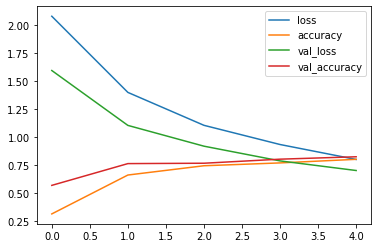

In [22]:
pd.DataFrame(history_10_percent_data_aug.history).plot()

In [23]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [24]:
model_2.layers

In [25]:
## checking the whole base model:
base_model.layers

In [ ]:
# Check which layers are tuneable (trainable)
for index, layer in enumerate(base_model.layers):
  print(index,layer.name, layer.trainable)

**TO begin fine-tuning, we'll unfreeze the entire base model by setting its trainable attribute to True. Then we'll refreeze every layer in the base model except for the last 10 by looping through them and setting their trainable attribute to False. Finally, we'll recompile the model.**

In [28]:
base_model.trainable= True
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [ ]:
 #Check which layers are tuneable (trainable)
for index, layer in enumerate(base_model.layers):
  print(index,layer.name, layer.trainable)

In [31]:
history_base_10_unfreeze= model_2.fit(train_data,
                                      epochs=10,
                                      validation_data=test_data,
                                    validation_steps=len(test_data),
                                    initial_epoch= history_10_percent_data_aug.epoch[-1],
                                     callbacks=[callback, 
                                                     checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.7410 - accuracy: 0.8107
Epoch 00005: val_loss improved from 0.70158 to 0.65888, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 22s 875ms/step - loss: 0.7410 - accuracy: 0.8107 - val_loss: 0.6589 - val_accuracy: 0.8208
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.8147
Epoch 00006: val_loss improved from 0.65888 to 0.62818, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 823ms/step - loss: 0.6809 - accuracy: 0.8147 - val_loss: 0.6282 - val_accuracy: 0.8280
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.6347 - accuracy: 0.8440
Epoch 00007: val_loss improved from 0.62818 to 0.59886, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 777ms/step - loss: 0.6347 - acc